In [32]:
from tensorflow.keras.models import load_model
from mtcnn_cv2 import MTCNN
from io import BytesIO
from PIL import Image

from flask import Response
from flask import Flask, request

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import normalize

from operator import attrgetter
from pathlib import Path
from glob import glob

import numpy as np
import requests
import base64
import json
import time
import cv2
import os

In [9]:
from tempfile import TemporaryDirectory, NamedTemporaryFile

In [22]:
with TemporaryDirectory(dir='') as tmpdir:
    f = NamedTemporaryFile(suffix='.jpeg', dir='')
    retval = cv2.imwrite(f.name, cv2.imread('../facecognition/data/joe/j1.jpeg', cv2.IMREAD_COLOR))

In [33]:
import sys
sys.path.append("./yolo-v4-tf.keras")
from models import Yolov4

In [34]:
dirname = 'tmp'
file = 'tmpfile'
suffix = '.jpeg'  # faster encoding

# make dir if not exist
os.makedirs(dirname, exist_ok=True)

In [43]:
WEIGHT_PATH = 'yolo/yolov4.weights'
CLASSES_PATH = 'yolo-v4-tf.keras/class_names/coco_classes.txt'

fname = f"{dirname}/{file}{suffix}"
# img_nparr = np.frombuffer(img_bytes, dtype=np.uint8)
# img_arr = cv2.imdecode(img_nparr, cv2.IMREAD_COLOR)
image_write = cv2.imwrite(fname, cv2.imread('../facecognition/data/samuelson/s0.jpg', cv2.IMREAD_COLOR))  # for web, use img_arr instead of cv2.imread

In [37]:
model = Yolov4(weight_path=WEIGHT_PATH, class_name_path=CLASSES_PATH)

nms iou: 0.413 score: 0.3
all weights read
load from yolo/yolov4.weights


img shape:  (768, 1152, 3)
# of bboxes: 2


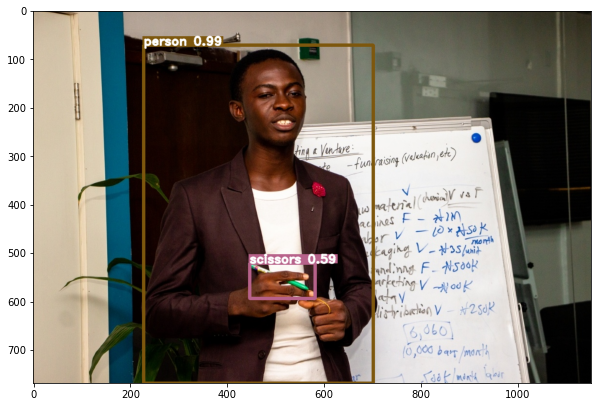

img shape:  (768, 1152, 3)
# of bboxes: 2


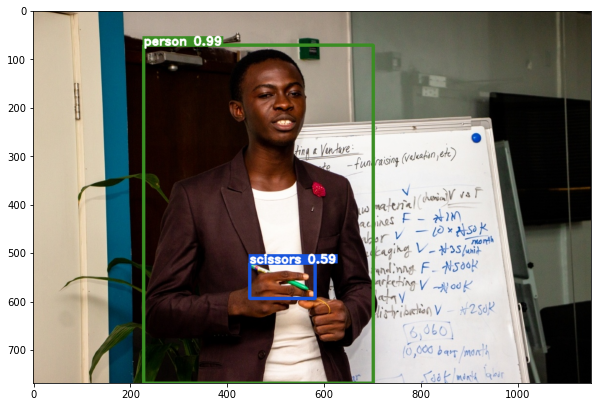

img shape:  (768, 1152, 3)
# of bboxes: 2


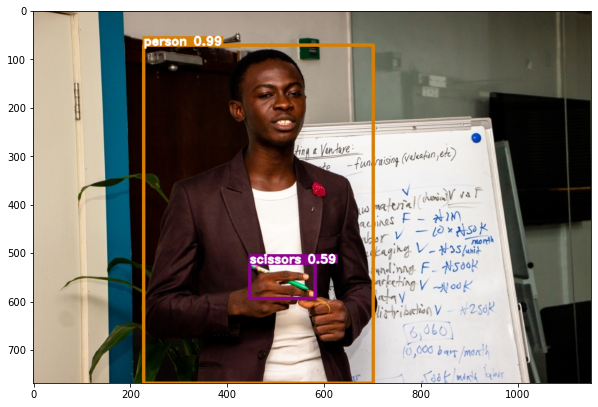

img shape:  (768, 1152, 3)
# of bboxes: 2


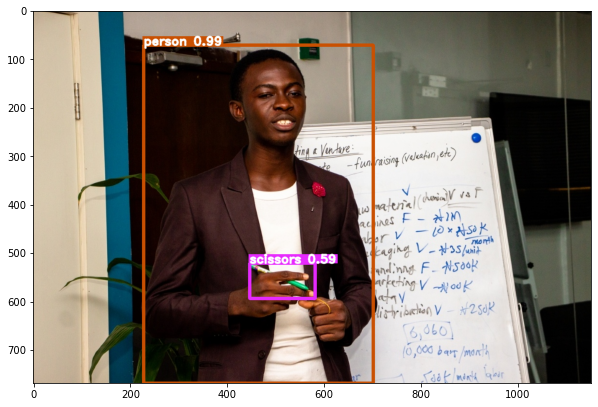

img shape:  (768, 1152, 3)
# of bboxes: 2


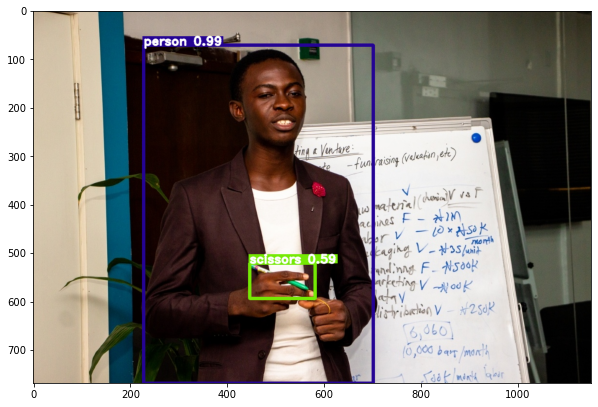

img shape:  (768, 1152, 3)
# of bboxes: 2


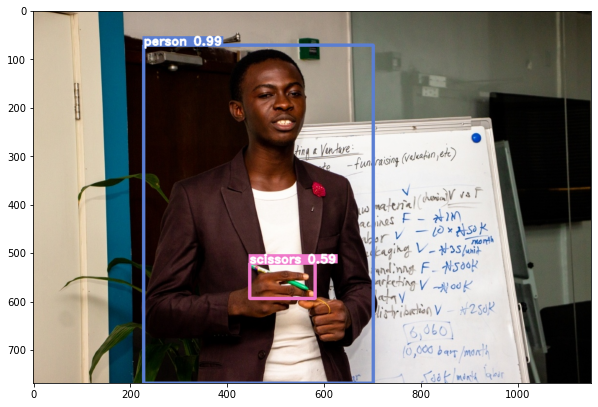

img shape:  (768, 1152, 3)
# of bboxes: 2


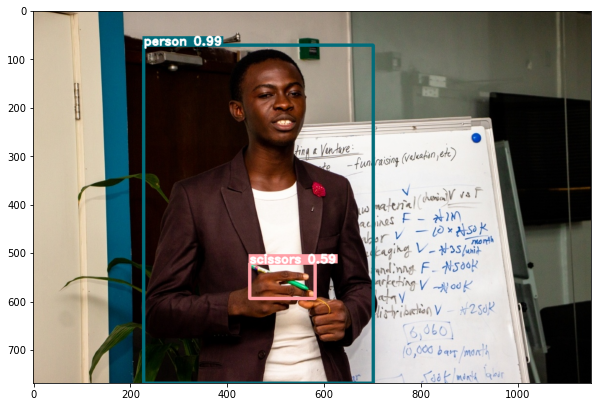

img shape:  (768, 1152, 3)
# of bboxes: 2


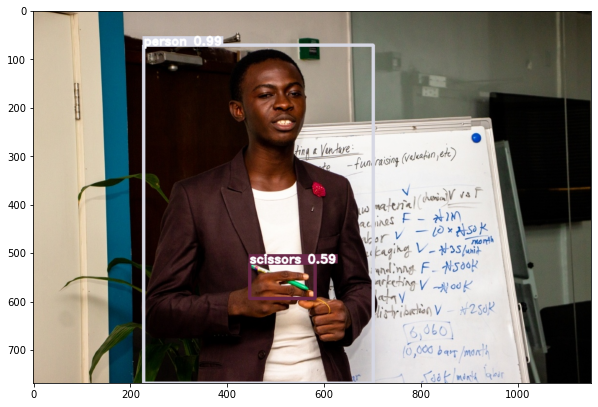

762 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%%timeit
if image_write:
    model.predict(fname)

In [46]:
model.predict(fname, plot_img=False)

img shape:  (768, 1152, 3)
# of bboxes: 2


,x1,y1,x2,y2,class_name,score,w,h
0,228,70,702,768,person,0.985186,474,698
1,447,520,582,593,scissors,0.586346,135,73


In [47]:
predictions = model.predict(fname, plot_img=False)

img shape:  (768, 1152, 3)
# of bboxes: 2


In [48]:
predictions.to_json()

'{"x1":{"0":228,"1":447},"y1":{"0":70,"1":520},"x2":{"0":702,"1":582},"y2":{"0":768,"1":593},"class_name":{"0":"person","1":"scissors"},"score":{"0":0.985186398,"1":0.5863462687},"w":{"0":474,"1":135},"h":{"0":698,"1":73}}'

In [50]:
json.loads(predictions.to_json())

{'x1': {'0': 228, '1': 447},
 'y1': {'0': 70, '1': 520},
 'x2': {'0': 702, '1': 582},
 'y2': {'0': 768, '1': 593},
 'class_name': {'0': 'person', '1': 'scissors'},
 'score': {'0': 0.985186398, '1': 0.5863462687},
 'w': {'0': 474, '1': 135},
 'h': {'0': 698, '1': 73}}

### Test image base64 string decoding

In [2]:
img_arro = cv2.imread('../facecognition/data/samuelson/s0.jpeg', cv2.IMREAD_COLOR)

In [30]:
%%timeit
# convert to base64
img_b64 = base64.b64encode(cv2.imencode('.jpeg', img_arro)[1].tobytes())
img_bytes = base64.b64decode(img_b64)
img_nparr = np.frombuffer(img_bytes, dtype=np.uint8)
img_arr = cv2.imdecode(img_nparr, cv2.IMREAD_COLOR)

2.64 ms ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
cv2.imshow('joe', img_arr)
cv2.waitKey(0)  # kill on keypress
cv2.destroyAllWindows()

In [31]:
with open('testest.jpg', 'wb') as t:
    t.write(img_bytes)